### Dataset Overview

**Decision Support System determining whether Patients have Heart Disease for Healthcare Professionals**

The dataset used in this project is a subset of the Heart Disease dataset from the Original Heart Disease
data repo.
It contains 76 attributes. However, the subset we are using only contains 14.

Our field of interest is the "target" variable, which indicates whether the patient likely suffers from heart
disease or not.
The objective of this project is to create a web application acting as a decision support system using data
exploration and machine learning techniques to determine whether a patient has heart disease and thus
needs to be treated or not.

The objective of this project is to gain a practical understanding of the use and implementation of decision
support systems in an organizational context. This project also aims to test the Python programming and
problem solving skills of the student.

**Question 1 - SQLite Database Connection**<br>
**Create and set up a connection to a SQLite database that you will be reading your data from.**

In [1]:
# Import Libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the dataset
data = pd.read_csv("heart.csv")
print(data.shape)
data.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#Create and Set Up SQLite Database


# Connect to a SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('heart_disease.db')

# Sanitize column names
data.columns = [c.replace(' ', '_').replace('-', '_') for c in data.columns]

# Ensure all data is in a compatible format
# data = data.astype(str)  # Uncomment if necessary

# Write the DataFrame to a SQL table
data.to_sql('heart_disease', conn, if_exists='replace', index=False)

# Verify the data was written correctly
query = 'SELECT * FROM heart_disease LIMIT 5;'
result = pd.read_sql(query, conn)
print(result)

# Close the connection
conn.close()


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### Question 2: Data Preprocessing and Visualization

Once you have established a connection to the database, you need to transform (preprocess) your data to
get it into a more consistent, accurate, and reliable format. This will then allow you to explore and visualize
the data to gain significant insights into it.

**2.1 Preprocessing and visualizing the data<br>
a. Perform any necessary cleaning and preprocessing of the data.**

In [4]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Check for missing values
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Describe data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Rename columns
data.rename(columns={
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_electrocardiographic_results',
    'thalach': 'maximum_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'ST_depression',
    'slope': 'slope_of_peak_exercise_ST_segment',
    'ca': 'number_of_major_vessels',
    'thal': 'thalassemia',
    'target': 'target'
}, inplace=True)


In [9]:
data.head()

,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression,slope_of_peak_exercise_ST_segment,number_of_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**B. Plot the distribution of classes for the (8) categorical variables based on the target variable. Provide any observations that can be derived from these plots.** 

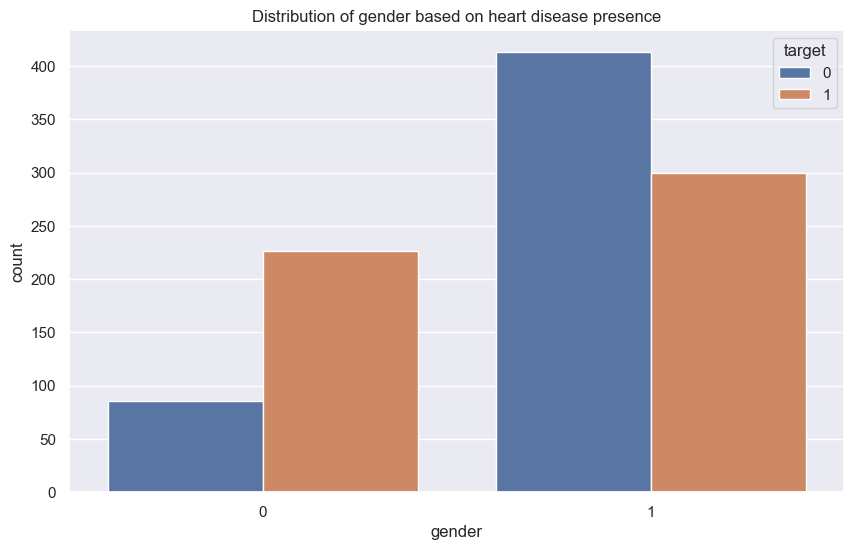

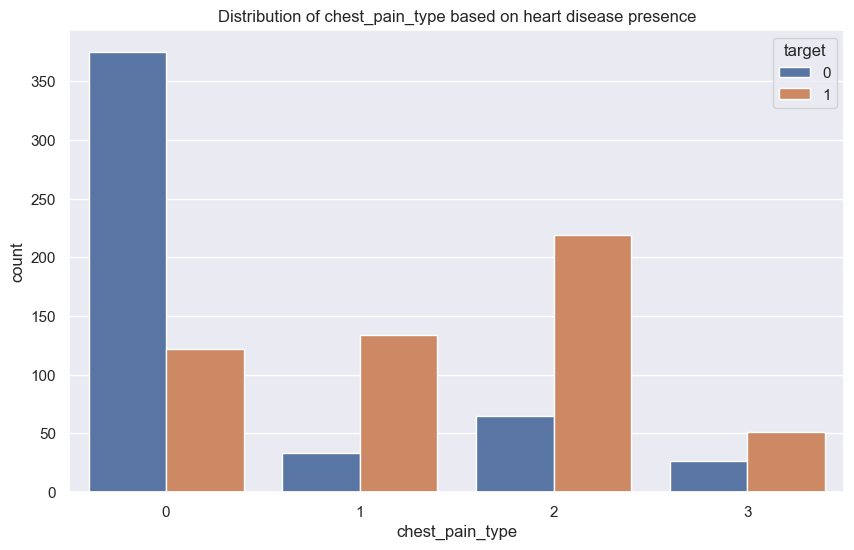

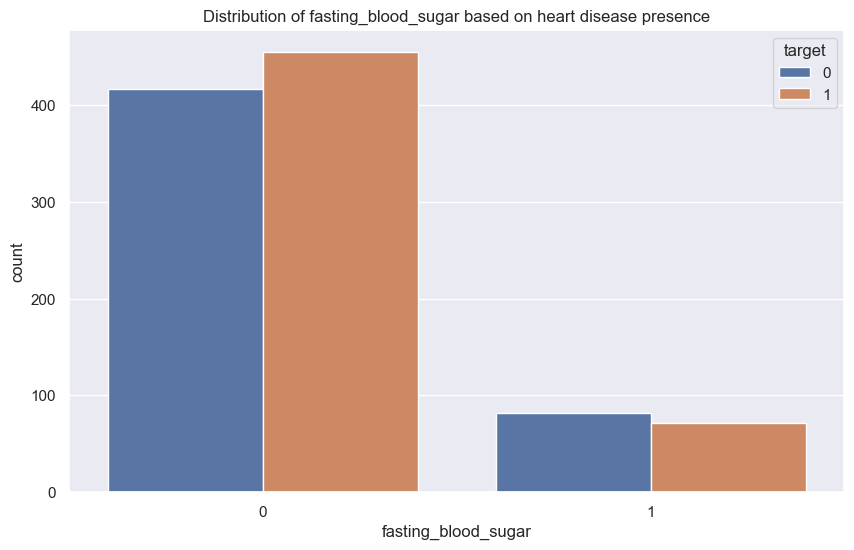

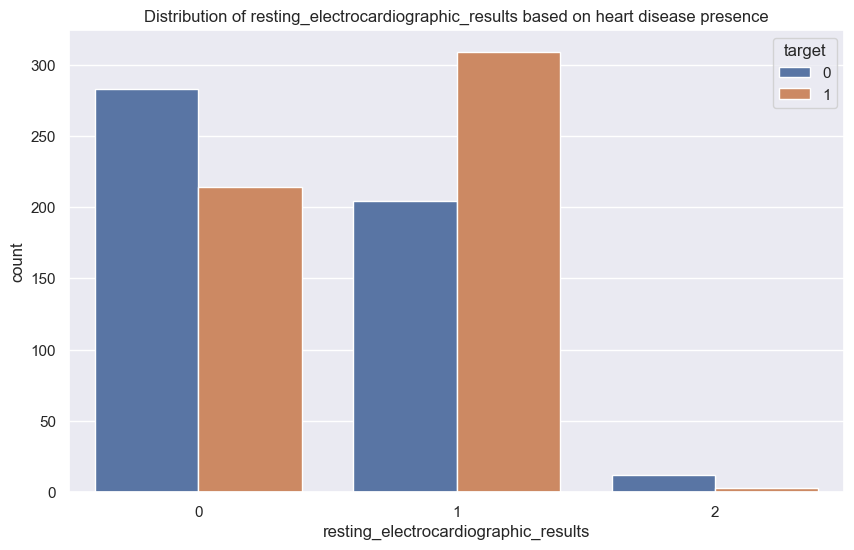

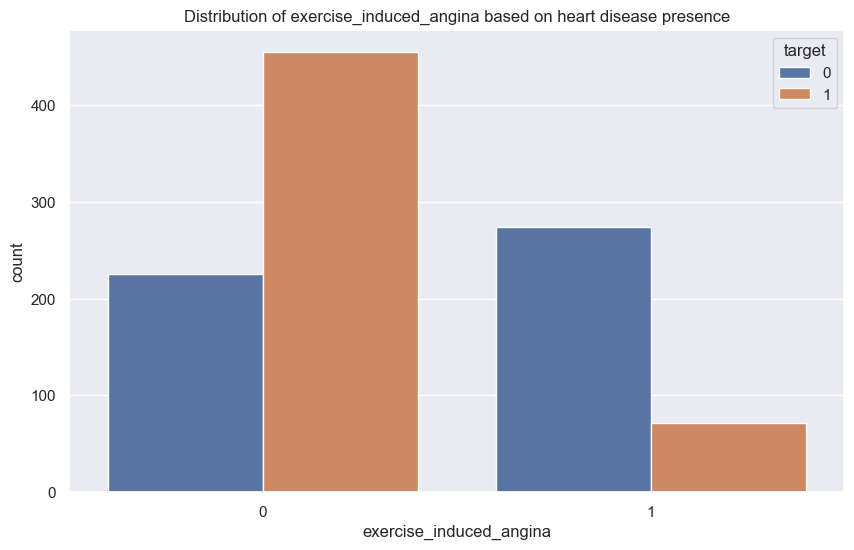

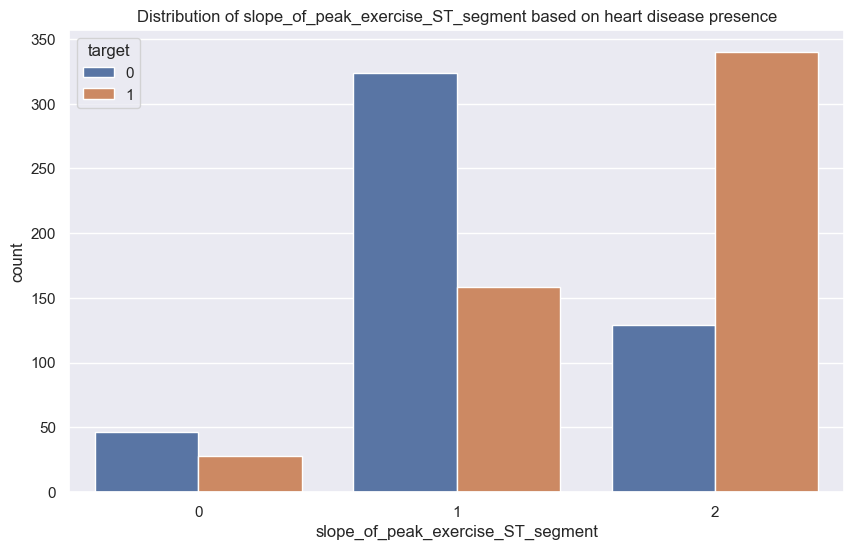

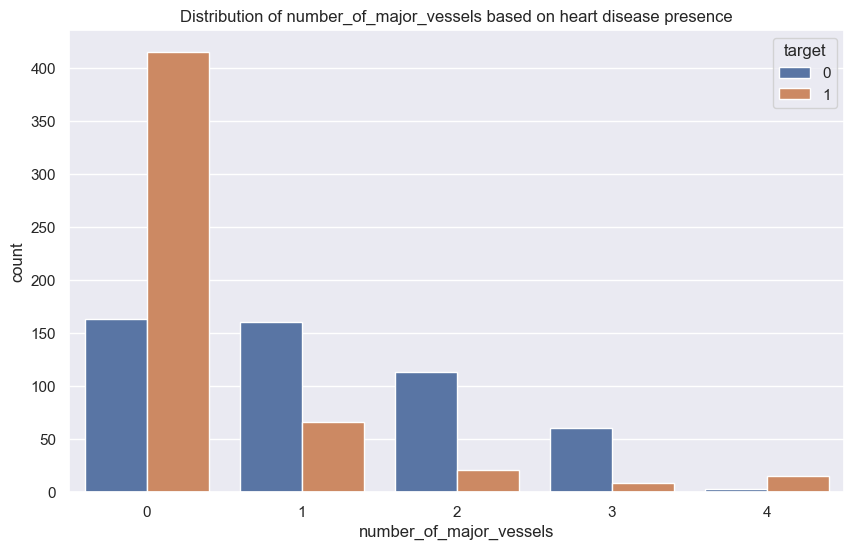

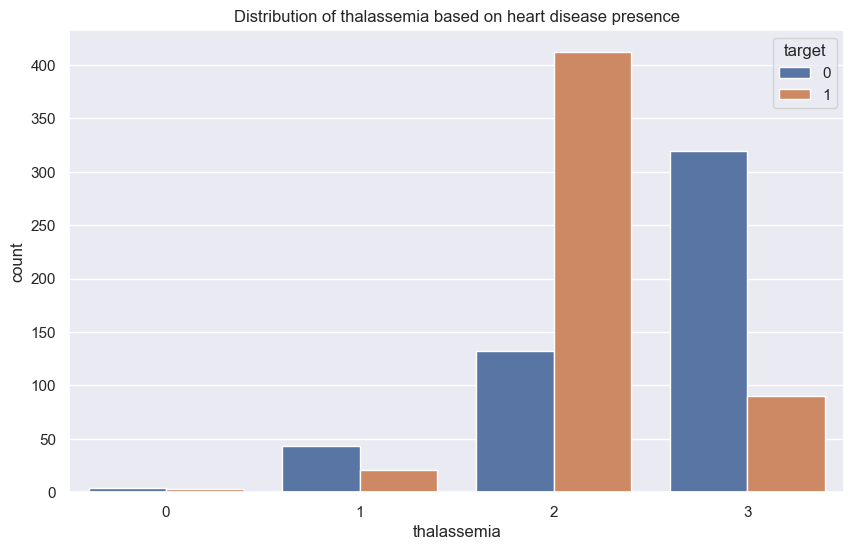

In [10]:
categorical_vars = ['gender', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiographic_results',
                    'exercise_induced_angina', 'slope_of_peak_exercise_ST_segment', 'number_of_major_vessels', 'thalassemia']

# Plotting the distribution of each categorical variable based on heart disease presence
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='target', data=data)
    plt.title(f'Distribution of {var} based on heart disease presence')
    plt.show()


Sex: Higher proportion of males diagnosed with heart disease.

Chest Pain Type (cp): Certain chest pain types (e.g., type 3) are more common in patients without heart disease.

Fasting Blood Sugar (fbs): FBS > 120 is not a significant indicator of heart disease.

Resting ECG (restecg): Specific ECG results correlate with heart disease.

Exercise Induced Angina (exang): Patients with exercise-induced angina are more likely to have heart disease.

Slope of the Peak Exercise ST Segment (slope): Certain slopes are associated with heart disease.

Number of Major Vessels (ca): Higher number of major vessels colored by fluoroscopy is associated with heart disease.

Thalassemia (thal): Certain thalassemia types are more common in heart disease patients.

**C. Plot the distribution of classes for the numeric variables based on the target variable. Provide any observations (at least 5) that can be derived from these plots**

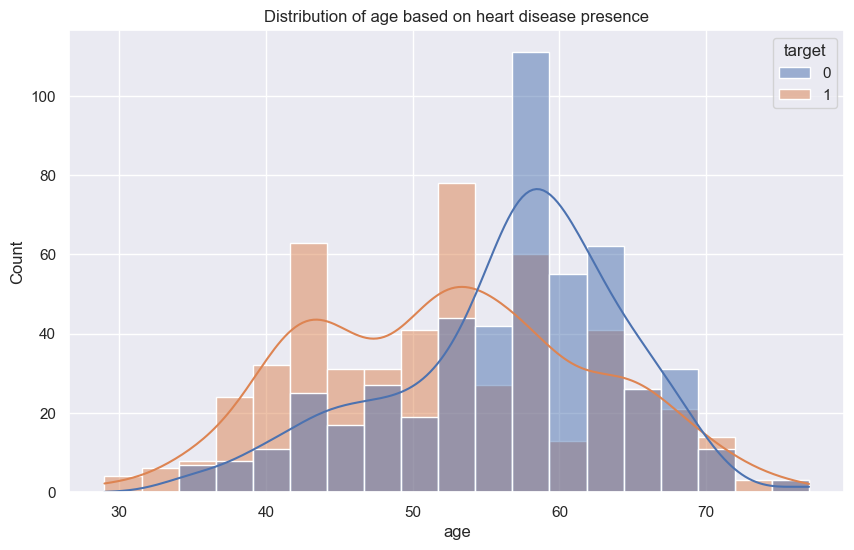

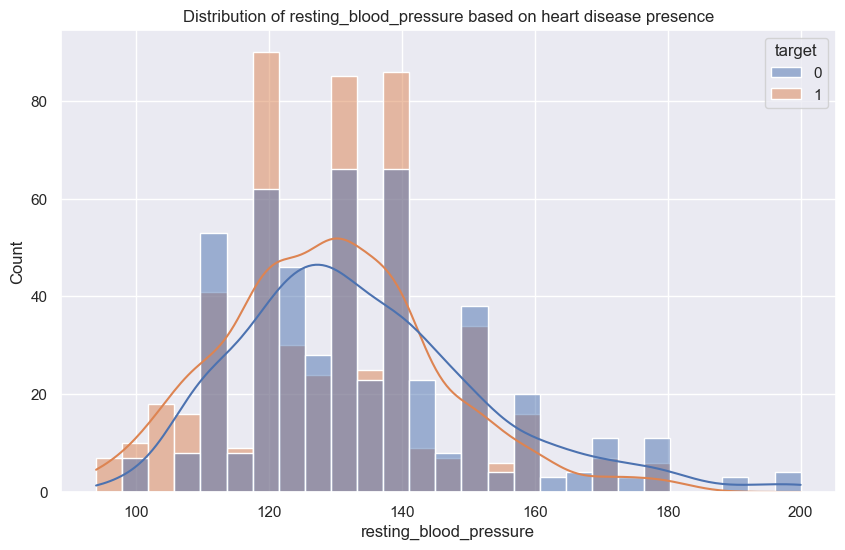

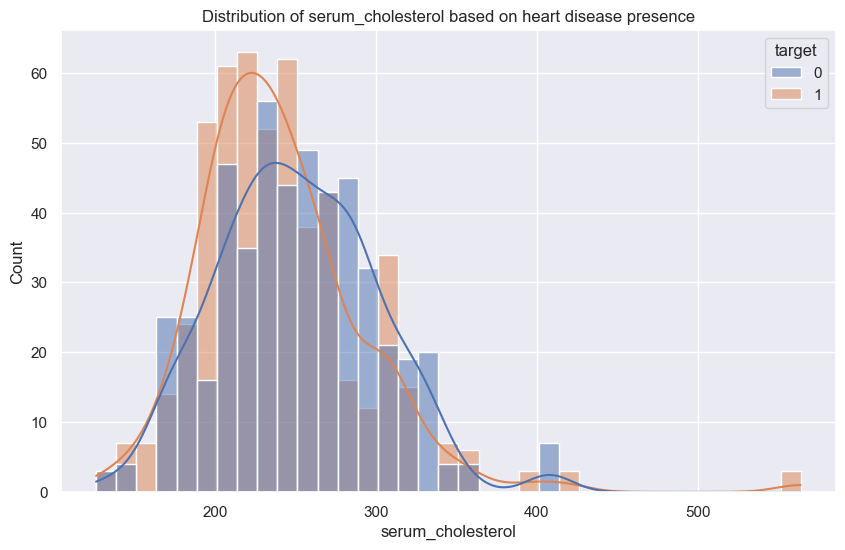

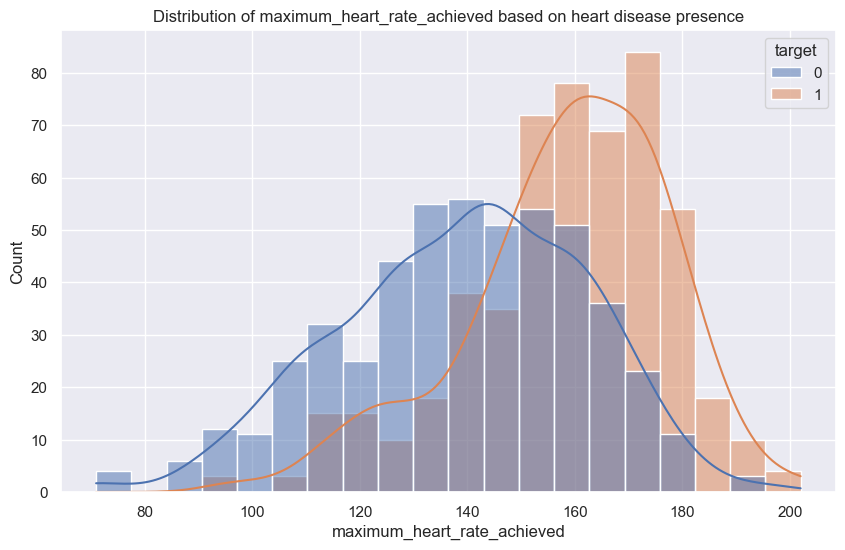

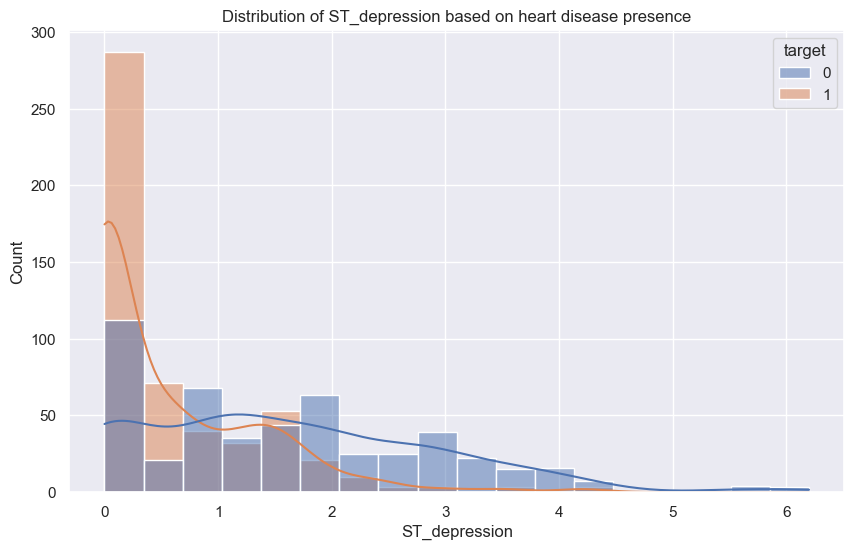

In [11]:
numeric_vars = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'maximum_heart_rate_achieved', 'ST_depression']

# Plotting the distribution of each numeric variable based on heart disease presence
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=var, hue='target', kde=True)
    plt.title(f'Distribution of {var} based on heart disease presence')
    plt.show()


Age: Older age groups have a higher likelihood of heart disease.

Resting Blood Pressure (trestbps): Higher resting blood pressure is common in patients with heart disease.

Cholesterol (chol): Higher cholesterol levels are more frequent in heart disease patients.

Maximum Heart Rate Achieved (thalach): Lower maximum heart rates are often observed in patients with heart disease.

ST Depression (oldpeak): Higher values of ST depression induced by exercise are linked with heart disease.

### Question 3 - Modelling Heart Disease Prediction Problem Through Machine Learning

**3.1 Get your data ready for fitting a machine learning model on it by performing the appropriate preprocessing techniques.**

In [12]:
# Split Data into Features and Target:

from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Standardize the Data:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


***3.2 Select 3 appropriate machine learning models for your heart disease prediction problem. Provide a short explanation of each chosen model as well as two advantages and disadvantages of each. Use the three models to fit your data and perform predictions on it, then determine which model performs the best. Save the model to disk.***

Logistic Regression:

Advantages: Simple and easy to interpret, works well for binary classification.
Disadvantages: Assumes linear relationship, can underperform with complex relationships.
Random Forest:

Advantages: Handles non-linear relationships well, robust to overfitting.
Disadvantages: Can be slow with large datasets, less interpretable than logistic regression.
Support Vector Machine (SVM):

Advantages: Effective in high-dimensional spaces, versatile with different kernel functions.
Disadvantages: Memory-intensive, hard to tune.

In [14]:
# Fit and Evaluate Models:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

# Determine the best model
accuracies = {'Logistic Regression': lr_acc, 'Random Forest': rf_acc, 'SVM': svm_acc}
best_model_name = max(accuracies, key=accuracies.get)
best_model = {'Logistic Regression': lr, 'Random Forest': rf, 'SVM': svm}[best_model_name]

print(f"Best model: {best_model_name} with accuracy {accuracies[best_model_name]}")


Best model: Random Forest with accuracy 0.9853658536585366


In [15]:
# Save the Best Model:
import joblib

joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

### Question 4: Web Application Using Streamlit

Web application using streamlit
Now that you have created and saved your model, you can deploy your model in a web application using
streamlit for medical practitioners to use.

* The functionality of your application
* The usability
* The design of the application
* The code design/structure
* Your code and application documentation
* Error-handling

In [16]:
# Create Streamlit App
import streamlit as st
import joblib
import numpy as np

# Load the saved model
model = joblib.load('best_model.pkl')

# Title
st.title('Heart Disease Prediction')

# User inputs
age = st.number_input('Age')
sex = st.selectbox('Sex', ['Male', 'Female'])
cp = st.selectbox('Chest Pain Type', ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
trestbps = st.number_input('Resting Blood Pressure')
chol = st.number_input('Cholesterol')
fbs = st.selectbox('Fasting Blood Sugar > 120 mg/dl', ['False', 'True'])
restecg = st.selectbox('Resting ECG', ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'])
thalach = st.number_input('Maximum Heart Rate Achieved')
exang = st.selectbox('Exercise Induced Angina', ['No', 'Yes'])
oldpeak = st.number_input('ST Depression Induced by Exercise')
slope = st.selectbox('Slope of the Peak Exercise ST Segment', ['Upsloping', 'Flat', 'Downsloping'])
ca = st.selectbox('Number of Major Vessels Colored by Fluoroscopy', ['0', '1', '2', '3'])
thal = st.selectbox('Thalassemia', ['Normal', 'Fixed Defect', 'Reversible Defect'])

# Predict
if st.button('Predict'):
    # Map categorical values to numerical values
    sex = 0 if sex == 'Male' else 1
    cp = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'].index(cp)
    fbs = 1 if fbs == 'True' else 0
    restecg = ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'].index(restecg)
    exang = 1 if exang == 'Yes' else 0
    slope = ['Upsloping', 'Flat', 'Downsloping'].index(slope)
    thal = ['Normal', 'Fixed Defect', 'Reversible Defect'].index(thal)
    
    features = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model.predict(features)
    
    if prediction[0] == 1:
        st.write('The patient is likely to have heart disease.')
    else:
        st.write('The patient is unlikely to have heart disease.')


2024-09-17 14:55:32.493 
  command:

    streamlit run C:\Users\nelio\anaconda3\envs\CISM\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-17 14:55:32.494 Session state does not function when running a script without `streamlit run`


In [17]:
#Run the app
!streamlit run streamlit_app.py

^C


Thank you